# Task 1 Simple Perceptron training algorithm

In [5]:
#/==================================
#// Computer Vision
#// Student: Vandit Jyotindra Gajjar
#// Student ID: a1779153
#// Semester: 1
#// Year: 2020
#// Assignment: 3
#//===================================

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display


In [7]:
class Perceptron:

    def __init__(self,input_size):

        self.input_size = input_size

        self.w = np.random.randn(input_size,1).reshape(input_size,1)

        self.history = []
        
    def train(self,X,Y, max_epochs = 100):

        self.history = []
        
        converged = False
        epochs = 0

        while not converged and epochs < max_epochs :

            converged, l_r = True, 0.001
            for i in range(len(X)):
                res = np.matmul(X[i],self.w)
                if res >= 0:
                    res = 1.0
                else:
                    res = 0.0
                if res!=Y[i]:
                    converged = False 
                    self.w = self.w + (Y[i] - res) * l_r * X[i].reshape(-1, 1)
            self.compute_train_accuracy(X,Y)
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged", epochs)
          
        self.plot_training_history()
    
    def draw(self,X):
      
        pl.close()
        pl.figure(figsize=[10,8])
        out = np.matmul(X,self.w).squeeze()
        
        P = X[out >= 0,:] 
        N = X[out.T < 0,:]
        
        x = np.linspace(0,1)
        
        pl.xlim((0,1))
        pl.ylim((0,1))
 
        pl.plot(P[:,0],P[:,1],'go', label = 'Positive')
        pl.plot(N[:,0],N[:,1],'rx', label = 'Negative')
        pl.plot(x, x, label = 'GT')
        
        a = self.w[0]
        b = self.w[1]
        c = self.w[2]
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())

    def compute_train_accuracy(self,X,Y):
        out = np.matmul(X,self.w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)

    def plot_training_history(self):
      pl.close()
      plt.figure(figsize=[10,8])
      plt.ylim((0,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()
      

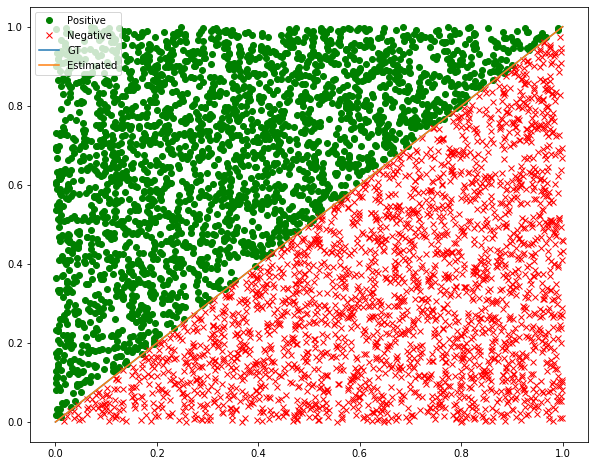

Qutting: Converged 8


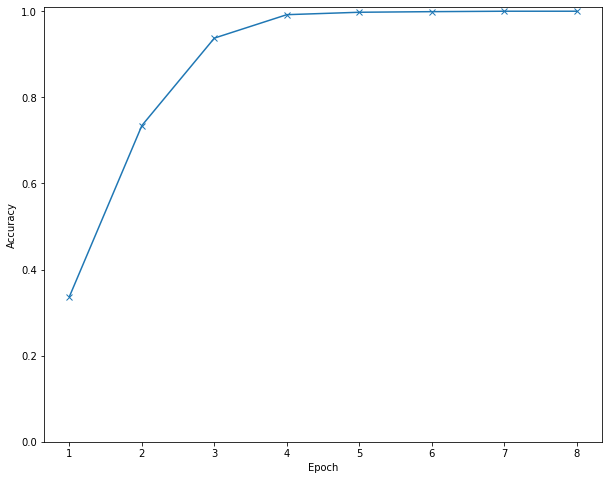

In [8]:
number_of_samples = 5000
max_number_of_epochs = 1000

X = np.random.rand(number_of_samples,2)
X = np.append(X, np.ones((X.shape[0],1)),axis = 1)

Y = X[:,1] > (X[:,0])
Y = np.float32(Y)
Y = Y.reshape((number_of_samples,1))

p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)